In [2]:
import requests
import pandas as pd

In [2]:
df = pd.read_csv('data/most-recent-cohorts-all-data-elements.csv',sep=',',low_memory=False)

In [19]:
four_year = df[df['HIGHDEG']>2]

In [4]:
four_year.shape

(2725, 2045)

In [21]:
four_year = four_year.dropna(axis='columns',how='all')

In [22]:
four_year.shape

(2725, 1968)

## Currently Operating Institutions

The dataset has a dummy variable (CURROPER) that flags institutions that were opened vs not opened in the reporting year. There are 79 institutions that were marked as not open. May be worth filtering those out.

In [12]:
four_year[four_year['CURROPER']==0]

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,PLUS_DEBT_ALL_STAFFANY_N,PLUS_DEBT_ALL_STAFFANY_MD,PLUS_DEBT_INST_NOSTAFFANY_N,PLUS_DEBT_INST_NOSTAFFANY_MD,PLUS_DEBT_ALL_NOSTAFFANY_N,PLUS_DEBT_ALL_NOSTAFFANY_MD,COUNT_NWNE_3YR,COUNT_WNE_3YR,CNTOVER150_3YR,SEARCH_STRING
44,102058,4067300,40673,Selma University,Selma,AL,36701,NaN,selmauniversity.edu,selmauniversity.edu/NetPriceCalculator/npcalc.htm,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,4.0,20.0,10.0,Selma University
962,146825,171700,1717,MacMurray College,Jacksonville,IL,62650-2590,NaN,www.mac.edu,www.mac.edu/financialaid/npc.asp,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,2.0,136.0,125.0,MacMurray College MacMurray
968,147165,456800,4568,Midstate College,Peoria,IL,61614-3595,NaN,www.midstate.edu,www.midstate.edu/admissions/netpricecalculator/,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,7.0,149.0,125.0,Midstate College
1069,151458,457902,4579,International Business College-Fort Wayne,Fort Wayne,IN,46804-7145,NaN,www.ibcfortwayne.edu,www.ibcfortwayne.edu/aid,...,309,PrivacySuppressed,13,PrivacySuppressed,13,PrivacySuppressed,36.0,630.0,515.0,International Business College-Fort Wayne IBC
1122,153409,458606,4586,Purdue University Global-Mason City,Mason City,IA,50401,NaN,https://www.purdueglobal.edu/campus-locations/...,https://www.purdueglobal.edu/tuition-financial...,...,4512,8599,PrivacySuppressed,PrivacySuppressed,33,5392,1415.0,11972.0,9785.0,Purdue University Global-Mason City
1123,153418,458604,4586,Purdue University Global-Cedar Rapids,Cedar Rapids,IA,52404,NaN,https://www.purdueglobal.edu/campus-locations/...,https://www.purdueglobal.edu/tuition-financial...,...,4512,8599,PrivacySuppressed,PrivacySuppressed,33,5392,1415.0,11972.0,9785.0,Purdue University Global-Cedar Rapids
1356,160940,458616,4586,Purdue University Global-Lewiston,Lewiston,ME,04240-0000,NaN,https://www.purdueglobal.edu/campus-locations/...,https://www.purdueglobal.edu/tuition-financial...,...,4512,8599,PrivacySuppressed,PrivacySuppressed,33,5392,1415.0,11972.0,9785.0,Purdue University Global-Lewiston
1404,162681,458612,4586,Purdue University Global-Hagerstown,Hagerstown,MD,21742,NaN,https://www.purdueglobal.edu/campus-locations/...,https://www.purdueglobal.edu/tuition-financial...,...,4512,8599,PrivacySuppressed,PrivacySuppressed,33,5392,1415.0,11972.0,9785.0,Purdue University Global-Hagerstown
1441,164438,3965300,39653,New England College of Business and Finance,Boston,MA,02110,NaN,www.necb.edu/,https://enroll.necb.edu/Npc,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,14.0,277.0,263.0,New England College of Business and Finance
1444,164474,211600,2116,Andover Newton Theological School,Lexington,MA,02421,NaN,andovernewton.yale.edu/about,andovernewton.yale.edu/about,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,Andover Newton Theological School ANTS


In [23]:
four_year = four_year[four_year['CURROPER']==1]


## CCUGPROF Indicator

The CCUGPROF indicator may be a better indicator to use to identify 4-year institutions that award Bahcelor's degrees. Filter the indicator by values more than 4. Compared to HIGHDEG, this is a better indicator to use because use of the HIGHDEG indicator will show institutions that only offer grad degrees. Using the CCUGPROF indicator removes about 300 institutions from the pool.

In [59]:
#Filtering using the HIGHDEG (Highest Degree Offer) indicator

df[df['HIGHDEG']>2].shape

(2725, 2045)

In [68]:
#Filtering using the CCUGPROF (Carnegie Classification -- undergraduate profile) indicator
df[df['CCUGPROF']>4].shape

(2439, 2045)

In [64]:
#Filtering using the CCSIZSET (Carnegie Classification -- size and setting) indicator
df[df['CCSIZSET'].isin(range(6,18))].shape

(2461, 2045)

## Ignore This.

This is Tyler trying to figure things out. No conclusion have been drawn from this section yet.

In [70]:
four_year=df[df['CCUGPROF']>4]
four_year[(four_year['NPT4_75UP_PRIV'].isna()) & (four_year['NPT4_75UP_PUB'].isna()) & (four_year['CITY']=='Chicago')]

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,PLUS_DEBT_ALL_STAFFANY_N,PLUS_DEBT_ALL_STAFFANY_MD,PLUS_DEBT_INST_NOSTAFFANY_N,PLUS_DEBT_INST_NOSTAFFANY_MD,PLUS_DEBT_ALL_NOSTAFFANY_N,PLUS_DEBT_ALL_NOSTAFFANY_MD,COUNT_NWNE_3YR,COUNT_WNE_3YR,CNTOVER150_3YR,SEARCH_STRING
1001,148511,980000,9800,Rush University,Chicago,IL,60612,Higher Learning Commission,WWW.RUSHU.RUSH.EDU,NaN,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1.0,122.0,120.0,Rush University Rush University Medical Center
1029,149763,2214100,22141,Resurrection University,Chicago,IL,60622,Higher Learning Commission,www.resu.edu,https://tcc.ruffalonl.com/Resurrection%20Unive...,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,3.0,221.0,214.0,Resurrection University


In [71]:
four_year[(four_year['NPT4_75UP_PRIV'].isna()) & (four_year['CITY']=='Chicago')]

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,PLUS_DEBT_ALL_STAFFANY_N,PLUS_DEBT_ALL_STAFFANY_MD,PLUS_DEBT_INST_NOSTAFFANY_N,PLUS_DEBT_INST_NOSTAFFANY_MD,PLUS_DEBT_ALL_NOSTAFFANY_N,PLUS_DEBT_ALL_NOSTAFFANY_MD,COUNT_NWNE_3YR,COUNT_WNE_3YR,CNTOVER150_3YR,SEARCH_STRING
888,144005,169400,1694,Chicago State University,Chicago,IL,60628-1598,Higher Learning Commission,www.csu.edu,www.csu.edu/financialaid/netpricecalculator.htm,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,50.0,620.0,499.0,Chicago State University CSU
924,145600,177600,1776,University of Illinois at Chicago,Chicago,IL,60607,Higher Learning Commission,www.uic.edu,https://docs.financialaid.uic.edu/npcalc.htm,...,2731,20842,93,21060,105,21461,242.0,3894.0,3513.0,University of Illinois at Chicago UIC|U of I-C...
984,147776,169300,1693,Northeastern Illinois University,Chicago,IL,60625-4699,Higher Learning Commission,www.neiu.edu/,www.neiu.edu/financial-aid/financing-your-educ...,...,782,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,18,PrivacySuppressed,130.0,1468.0,1290.0,Northeastern Illinois University
1001,148511,980000,9800,Rush University,Chicago,IL,60612,Higher Learning Commission,WWW.RUSHU.RUSH.EDU,NaN,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1.0,122.0,120.0,Rush University Rush University Medical Center
1029,149763,2214100,22141,Resurrection University,Chicago,IL,60622,Higher Learning Commission,www.resu.edu,https://tcc.ruffalonl.com/Resurrection%20Unive...,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,3.0,221.0,214.0,Resurrection University


In [72]:
#completion_rate_l4yr_150_aian

investigate=four_year[(four_year['C150_4_WHITE'].isna()) & (four_year['C150_L4_WHITE'].isna()) & (four_year['CITY']=='Chicago')]

In [80]:
investigate[['HIGHDEG','INSTNM','PREDDEG','CCUGPROF','CONTROL','HSI','C150_4_WHITE','D150_4','C150_4_HISP','C150_4_BLACK']]

,HIGHDEG,INSTNM,PREDDEG,CCUGPROF,CONTROL,HSI,C150_4_WHITE,D150_4,C150_4_HISP,C150_4_BLACK
976,4,National Louis University,3,7.0,2,1.0,NaN,18.0,0.2727,0.0
1001,4,Rush University,3,7.0,2,0.0,NaN,NaN,NaN,NaN
1029,4,Resurrection University,3,7.0,2,0.0,NaN,NaN,NaN,NaN


In [53]:
four_year[(four_year['HIGHDEG']==4) & (four_year['CITY']=='Chicago')]

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,PLUS_DEBT_ALL_STAFFANY_N,PLUS_DEBT_ALL_STAFFANY_MD,PLUS_DEBT_INST_NOSTAFFANY_N,PLUS_DEBT_INST_NOSTAFFANY_MD,PLUS_DEBT_ALL_NOSTAFFANY_N,PLUS_DEBT_ALL_NOSTAFFANY_MD,COUNT_NWNE_3YR,COUNT_WNE_3YR,CNTOVER150_3YR,SEARCH_STRING
862,142832,2068100,20681,Adler University,Chicago,IL,60602,Higher Learning Commission,www.adler.edu,www.adler.edu,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,Adler University
864,142957,2311300,23113,American Islamic College,Chicago,IL,60613,NaN,www.aicusa.edu,www.aicusa.edu/admissions/financing-your-educa...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Islamic College
865,143048,175300,1753,School of the Art Institute of Chicago,Chicago,IL,60603,Higher Learning Commission,www.saic.edu,https://saic.studentaidcalculator.com/survey.aspx,...,478,PrivacySuppressed,10,PrivacySuppressed,10,PrivacySuppressed,69.0,512.0,371.0,School of the Art Institute of Chicago
884,143659,923200,9232,Catholic Theological Union at Chicago,Chicago,IL,60615-5698,Commission on Accrediting of the Association o...,www.ctu.edu,www.ctu.edu/admissions/fees,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,Catholic Theological Union at Chicago CTU
887,143978,2155307,21553,The Chicago School of Professional Psychology ...,Chicago,IL,60654,Western Association of Schools and Colleges Se...,www.thechicagoschool.edu,www.thechicagoschool.edu/admissions/financial-...,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1.0,24.0,21.0,The Chicago School of Professional Psychology ...
888,144005,169400,1694,Chicago State University,Chicago,IL,60628-1598,Higher Learning Commission,www.csu.edu,www.csu.edu/financialaid/netpricecalculator.htm,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,50.0,620.0,499.0,Chicago State University CSU
889,144014,166100,1661,Chicago Theological Seminary,Chicago,IL,60637,Commission on Accrediting of the Association o...,https://www.ctschicago.edu,www.ctschicago.edu,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,Chicago Theological Seminary
890,144050,177400,1774,University of Chicago,Chicago,IL,60637,Higher Learning Commission,WWW.UCHICAGO.EDU,https://collegeadmissions.uchicago.edu/costs/c...,...,815,27407,29,34006,54,30000,73.0,874.0,784.0,University of Chicago
898,144281,166500,1665,Columbia College Chicago,Chicago,IL,60605-1996,Higher Learning Commission,www.colum.edu,https://colum.studentaidcalculator.com/survey....,...,2012,37912,36,25241,39,29738,185.0,2724.0,2124.0,Columbia College Chicago
903,144740,167100,1671,DePaul University,Chicago,IL,60604,Higher Learning Commission,https://www.depaul.edu,https://depaul.studentaidcalculator.com/survey...,...,4378,32772,75,35832,95,31559,287.0,4176.0,3760.0,DePaul University


In [50]:
data[(data['C150_4_WHITE'].isna()) & (data['C150_L4_WHITE'].isna()) & (data['CITY']=='Chicago')]

NameError: name 'data' is not defined

## Is it value in just looking at columns that do not contain any NaN values?

No. This is a bad idea. There are only 218 columns that do not contain any NaN values. These columns include institution name location, highest degree awarded, cargenie indictator, flagship indicator, if the school has a specific program.

In [9]:
#Creates a list of column names of columns that contain a NaN value 
all_values_exist=four_year.dropna(axis='columns',how='any').columns

In [10]:
#Pulls in data dictionary
data_dictionary = pd.read_excel('data/collegescorecarddatadictionary.xlsx',sheet_name='institution_data_dictionary')

In [11]:
#Filters data dictionary to only show column names that are in the list created
all_values_dict = data_dictionary[data_dictionary['VARIABLE NAME'].isin(all_values_exist)]

In [12]:
#This section is completely commented out to avoid creating excel export.

# Create a Pandas Excel writer using XlsxWriter as the engine.
#writer = pd.ExcelWriter('export.xlsx', engine='xlsxwriter')

# Position the dataframes in the worksheet.
#all_values_dict.to_excel(writer, sheet_name='Sheet1')  # Default position, cell A1.

# Close the Pandas Excel writer and output the Excel file.
#writer.save()

In [13]:
for i in all_values_exist:
    print('Column Name:' + i)
    print(four_year[i].unique())
    print()

Column Name:UNITID
[100654 100663 100690 ..., 492689 492801 492962]

Column Name:OPEID
[ 100200  105200 2503400 ..., 4271100 4276100 1067401]

Column Name:OPEID6
[ 1002  1052 25034 ..., 42693 42711 42761]

Column Name:INSTNM
['Alabama A & M University' 'University of Alabama at Birmingham'
 'Amridge University' ...,
 'Texas Tech University Health Sciences Center-El Paso'
 'Drury University-College of Continuing Professional Studies'
 'Indiana Institute of Technology-College of Professional Studies']

Column Name:CITY
['Normal' 'Birmingham' 'Montgomery' ..., 'Keyport' 'Petaluma' 'Hot Springs']

Column Name:STABBR
['AL' 'AK' 'WA' 'AZ' 'AR' 'CA' 'MN' 'CO' 'CT' 'NY' 'DE' 'DC' 'FL' 'GA' 'HI'
 'ID' 'IL' 'IN' 'IA' 'KS' 'MO' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MS' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN' 'TX'
 'UT' 'VT' 'VA' 'WV' 'WI' 'WY' 'AS' 'GU' 'MP' 'PR' 'VI']

Column Name:ZIP
['35762' '35294-0110' '36117-3553' ..., '79905-2827' '65802' '46803']

Column 

## Combining Datsets Across Years

With the historical data, it would be useful to have the datasets for the years in one dataframe. Using a loop, I wrote code to concat the datasets. The code below merges the datasets from 2000-2018 into one dataframe.

The code does work. After looping through about 3 times, the dataframe gets too big and causes issues. I do not recommend running this code in its entirely if you do not have high system memory. 

In [4]:
years_import_list = {0:'00',1:'01',2:'02',3:'03',4:'04',5:'05',6:'06',7:'07',8:'08',9:'09',
                     10:'10',11:'11',12:'12',13:'13',14:'14',15:'15',16:'16',17:'17',18:'18',19:'19'}

all_years= pd.DataFrame()

for i in reversed(range(0,19)):
    first = years_import_list[i]
    b = i + 1
    second = years_import_list[b]
    df = pd.read_csv(f'data/MERGED20{first}_{second}_PP.csv',sep=',',low_memory=False)
    df = df.dropna(axis='columns',how='all')
    df['MERGED_YEAR_FROM']= first + '-' + second
    all_years = pd.concat([df,all_years],sort=False)
    df = pd.DataFrame()

In [33]:
all_years


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,PLUS_DEBT_ALL_STAFFANY_N,PLUS_DEBT_ALL_STAFFANY_MD,PLUS_DEBT_INST_NOSTAFFANY_N,PLUS_DEBT_INST_NOSTAFFANY_MD,PLUS_DEBT_ALL_NOSTAFFANY_N,PLUS_DEBT_ALL_NOSTAFFANY_MD,COUNT_NWNE_3YR,COUNT_WNE_3YR,CNTOVER150_3YR,MERGED_YEAR_FROM
0,100636,01230800,12308,Community College of the Air Force,Montgomery,AL,36114-3011,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05-06
1,100654,00100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05-06
2,100663,00105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05-06
3,100690,02503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05-06
4,100706,00105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05-06
5,100724,00100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05-06
6,100751,00105100,1051,The University of Alabama,Tuscaloosa,AL,35487-0100,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05-06
7,100760,00100700,1007,Central Alabama Community College,Alexander City,AL,35010,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05-06
8,100812,00100800,1008,Athens State University,Athens,AL,35611,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05-06
9,100830,00831000,8310,Auburn University at Montgomery,Montgomery,AL,36117-3596,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05-06


In [10]:
all_years.shape

(136079, 2034)

In [ ]:
#This section is completely commented out to avoid creating excel export.

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('data/Years00-01_18-19.xlsx', engine='xlsxwriter')

# Position the dataframes in the worksheet.
all_years.to_excel(writer, sheet_name='Sheet1')  # Default position, cell A1.

# Close the Pandas Excel writer and output the Excel file.
writer.save()

## Highly Correlated Indicators
Code belows identifies highly correlated columns of interest

In [5]:
columns_of_interest=[
'OPEID', 'INSTNM', 'CITY', 'STABBR', 'INSTURL', 
'CCUGPROF', 'HIGHDEG', 'CONTROL', 'LOCALE', 'LATITUDE', 'LONGITUDE', 
'CCSIZSET', 'HBCU', 'PBI', 'ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI', 
'MENONLY', 'WOMENONLY', 'RELAFFIL', 'ADM_RATE', 'UGDS', 'UG', 'UGDS_WHITE','UGDS_BLACK', 
'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 
'UGDS_UNKN', 'UGDS_WHITENH', 'UGDS_BLACKNH', 'UGDS_API', 'UGDS_AIANOLD', 
'UGDS_HISPOLD', 'UG_NRA', 'UG_UNKN', 'CURROPER', 
'NPT4_PUB', 'NPT4_PRIV', 'NPT41_PUB','NPT42_PUB', 'NPT43_PUB','NPT44_PUB', 'NPT45_PUB', 
'NPT41_PRIV', 'NPT42_PRIV', 'NPT43_PRIV', 'NPT44_PRIV', 'NPT45_PRIV', 
'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'TUITFTE', 'INEXPFTE', 'PCTPELL', 
'C150_4', 'C150_4_WHITE', 'C150_4_BLACK', 'C150_4_HISP','C150_4_ASIAN', 
'C150_4_AIAN','C150_4_NHPI', 'C150_4_2MOR', 'C150_4_NRA', 
'C150_4_UNKN', 'C150_4_WHITENH', 'C150_4_BLACKNH', 'C150_4_API', 
'C150_4_AIANOLD', 'C150_4_HISPOLD', 
'CDR2', 'CDR3', 'LO_INC_COMP_ORIG_YR4_RT', 'MD_INC_COMP_ORIG_YR4_RT', 
'HI_INC_COMP_ORIG_YR4_RT', 'FEMALE_COMP_ORIG_YR4_RT', 'MALE_COMP_ORIG_YR4_RT', 
'FIRSTGEN_COMP_ORIG_YR4_RT', 'NOT1STGEN_COMP_ORIG_YR4_RT', 'LO_INC_COMP_ORIG_YR6_RT',
'MD_INC_COMP_ORIG_YR6_RT', 'HI_INC_COMP_ORIG_YR6_RT', 'PAR_ED_PCT_1STGEN', 
'DEP_INC_AVG', 'IND_INC_AVG', 'GRAD_DEBT_MDN', 'PELL_DEBT_MDN', 
'AGEGE24', 'FAMINC', 'MD_FAMINC', 'MEDIAN_HH_INC', 'COUNT_NWNE_P10', 
'COUNT_WNE_P10', 'MN_EARN_WNE_INC1_P10', 'MN_EARN_WNE_INC2_P10', 
'MN_EARN_WNE_INC3_P10', 'COUNT_NWNE_P6', 'COUNT_WNE_P6', 
'COUNT_NWNE_P7', 'COUNT_WNE_P7', 'COUNT_NWNE_P8', 'COUNT_WNE_P8', 
'COUNT_NWNE_P9', 'COUNT_WNE_P9', 'OPENADMP', 'D150_4_WHITE', 
'D150_4_BLACK', 'D150_4_HISP', 'D150_4_ASIAN', 'D150_4_AIAN', 
'D150_4_NHPI', 'D150_4_2MOR', 'D150_4_NRA', 'D150_4_UNKN', 
'RET_FT4_POOLED', 'RET_FT4_POOLED_SUPP', 'COUNT_NWNE_3YR', 'COUNT_WNE_3YR', 
]

In [6]:
#Creates new dataframe with columns of interest
project_data = df[columns_of_interest].copy().dropna(axis='columns',how='all')

project_data = project_data[project_data['CURROPER']==1]
project_data = project_data[project_data['CCUGPROF']>4]

corr = project_data.corr()
columns = corr.columns

In [7]:
#Creates a dataframe with correlation values that meets set threshold

#Sets correlation threshold
correlation_threshold = .6

high_corrs=pd.DataFrame()


for columns_x in columns:
    for columns_y in columns:
        value=corr.at[columns_x,columns_y]
        if (value > correlation_threshold or value < -correlation_threshold) and (columns_x!=columns_y):
            temp_df = pd.DataFrame([[columns_x,columns_y,value]],columns=['column 1','column 2','correlation'])
            high_corrs=pd.concat([high_corrs,temp_df])

            
high_corrs=high_corrs.reset_index().drop(columns='index')
high_corrs.sort_values(by='correlation')   

,column 1,column 2,correlation
96,TUITIONFEE_OUT,NPT4_PUB,0.602387
20,NPT4_PUB,TUITIONFEE_OUT,0.602387
90,TUITIONFEE_IN,NPT42_PUB,0.603618
39,NPT42_PUB,TUITIONFEE_IN,0.603618
87,NPT45_PRIV,C150_4,0.604795
109,C150_4,NPT45_PRIV,0.604795
136,C150_4_UNKN,C150_4_WHITE,0.604957
123,C150_4_WHITE,C150_4_UNKN,0.604957
134,C150_4_2MOR,C150_4_BLACK,0.607068
128,C150_4_BLACK,C150_4_2MOR,0.607068


In [8]:
#Deletes duplicate rows with function

def create_key(row):
    if  row['column 1'] < row['column 2']:
        return row['column 1'] + row['column 2']
    else:
        return row['column 2'] + row['column 1'] 

high_corrs['Key'] = high_corrs.apply(create_key, axis=1)
high_corrs.drop_duplicates(subset ="Key", keep = 'first', inplace = True)
high_corrs = high_corrs.drop(columns='Key')
high_corrs

,column 1,column 2,correlation
0,OPEID,COUNT_NWNE_3YR,0.802546
1,OPEID,COUNT_WNE_3YR,0.707051
2,CCUGPROF,NPT45_PUB,0.635382
3,CCSIZSET,UGDS,0.637203
4,CCSIZSET,D150_4_WHITE,0.627321
5,HBCU,UGDS_BLACK,0.681345
6,TRIBAL,UGDS_AIAN,0.965931
7,HSI,UGDS_HISP,0.686479
9,UGDS,D150_4_WHITE,0.733126
10,UGDS,D150_4_2MOR,0.680133


In [9]:
#Use the data dictionary to add the variables name to the dataframe

data_dictionary = pd.read_excel('data/collegescorecarddatadictionary.xlsx',sheet_name='institution_data_dictionary')
data_dictionary=data_dictionary[['NAME OF DATA ELEMENT','VARIABLE NAME']]
data_dictionary.columns

high_corrs_with_name=pd.merge(left=high_corrs,right=data_dictionary,left_on='column 1',right_on='VARIABLE NAME',how='left').drop(columns='VARIABLE NAME')
high_corrs_with_name=pd.merge(left=high_corrs_with_name,right=data_dictionary,left_on='column 2',right_on='VARIABLE NAME',how='left').drop(columns='VARIABLE NAME')

high_corrs_with_name=high_corrs_with_name.sort_values(by='column 1')

high_corrs_with_name

,column 1,column 2,correlation,NAME OF DATA ELEMENT_x,NAME OF DATA ELEMENT_y
60,C150_4,C150_4_BLACK,0.775266,"Completion rate for first-time, full-time stud...","Completion rate for first-time, full-time stud..."
64,C150_4,RET_FT4_POOLED,0.675376,"Completion rate for first-time, full-time stud...","First-time, full-time student retention rate a..."
62,C150_4,C150_4_2MOR,0.694839,"Completion rate for first-time, full-time stud...","Completion rate for first-time, full-time stud..."
61,C150_4,C150_4_HISP,0.742109,"Completion rate for first-time, full-time stud...","Completion rate for first-time, full-time stud..."
63,C150_4,C150_4_UNKN,0.688171,"Completion rate for first-time, full-time stud...","Completion rate for first-time, full-time stud..."
59,C150_4,C150_4_WHITE,0.916724,"Completion rate for first-time, full-time stud...","Completion rate for first-time, full-time stud..."
70,C150_4_BLACK,C150_4_HISP,0.620322,"Completion rate for first-time, full-time stud...","Completion rate for first-time, full-time stud..."
71,C150_4_BLACK,C150_4_2MOR,0.607068,"Completion rate for first-time, full-time stud...","Completion rate for first-time, full-time stud..."
69,C150_4_WHITE,RET_FT4_POOLED,0.624743,"Completion rate for first-time, full-time stud...","First-time, full-time student retention rate a..."
68,C150_4_WHITE,C150_4_UNKN,0.604957,"Completion rate for first-time, full-time stud...","Completion rate for first-time, full-time stud..."


In [10]:
#This section is completely commented out to avoid creating excel export.

# Create a Pandas Excel writer using XlsxWriter as the engine.
#writer = pd.ExcelWriter('export.xlsx', engine='xlsxwriter')

# Position the dataframes in the worksheet.
#high_corrs_with_name.to_excel(writer, sheet_name='Sheet1')  # Default position, cell A1.

# Close the Pandas Excel writer and output the Excel file.
#writer.save()

## Key Reference Sheet

In [18]:
data_dictionary = pd.read_excel('data/collegescorecarddatadictionary.xlsx',sheet_name='institution_data_dictionary')
data_dictionary=data_dictionary[['NAME OF DATA ELEMENT','VARIABLE NAME']]



NAME OF DATA ELEMENT    True
VARIABLE NAME           True
dtype: bool

In [27]:
reference_sheet = data_dictionary[data_dictionary['VARIABLE NAME'].isin(columns_of_interest)]

reference_sheet[reference_sheet['NAME OF DATA ELEMENT'].str.contains('work')]

,NAME OF DATA ELEMENT,VARIABLE NAME
1878,Number of students not working and not enrolle...,COUNT_NWNE_P10
1879,Number of students working and not enrolled 10...,COUNT_WNE_P10
1897,Mean earnings of students working and not enro...,MN_EARN_WNE_INC1_P10
1898,Mean earnings of students working and not enro...,MN_EARN_WNE_INC2_P10
1899,Mean earnings of students working and not enro...,MN_EARN_WNE_INC3_P10
1905,Number of students not working and not enrolle...,COUNT_NWNE_P6
1906,Number of students working and not enrolled 6 ...,COUNT_WNE_P6
1932,Number of students not working and not enrolle...,COUNT_NWNE_P7
1933,Number of students working and not enrolled 7 ...,COUNT_WNE_P7
1937,Number of students not working and not enrolle...,COUNT_NWNE_P8


## The Model 

"How do we rank schools?" This question is the backbone to the project. After reading up on how other tackle ranking algorithms, I propose developing a model similiar to computing a weighted average. First, the selected factors are ranked using in ascending/descending order using the rank() function. Then, the percentile for those rankings are found, multipled by the inputted importance number, summed, and divided by the total of the weights.


In [2]:
#Create dataframe for project

df = pd.read_csv('data/most-recent-cohorts-all-data-elements.csv',sep=',',low_memory=False)
four_year = df.copy()

four_year = four_year[four_year['CURROPER']==1]
four_year = four_year[four_year['CCUGPROF']>4]


columns_of_interest=[
'OPEID', 'INSTNM', 'CITY', 'STABBR', 'INSTURL', 
'CCUGPROF', 'HIGHDEG', 'CONTROL', 'LOCALE', 'LATITUDE', 'LONGITUDE', 
'CCSIZSET', 'HBCU', 'PBI', 'ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI', 
'MENONLY', 'WOMENONLY', 'RELAFFIL', 'ADM_RATE', 'UGDS', 'UG', 'UGDS_WHITE','UGDS_BLACK', 
'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 
'UGDS_UNKN', 'UGDS_WHITENH', 'UGDS_BLACKNH', 'UGDS_API', 'UGDS_AIANOLD', 
'UGDS_HISPOLD', 'UG_NRA', 'UG_UNKN', 'CURROPER', 
'NPT4_PUB', 'NPT4_PRIV', 'NPT41_PUB','NPT42_PUB', 'NPT43_PUB','NPT44_PUB', 'NPT45_PUB', 
'NPT41_PRIV', 'NPT42_PRIV', 'NPT43_PRIV', 'NPT44_PRIV', 'NPT45_PRIV', 
'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'TUITFTE', 'INEXPFTE', 'PCTPELL', 
'C150_4', 'C150_4_WHITE', 'C150_4_BLACK', 'C150_4_HISP','C150_4_ASIAN', 
'C150_4_AIAN','C150_4_NHPI', 'C150_4_2MOR', 'C150_4_NRA', 
'C150_4_UNKN', 'C150_4_WHITENH', 'C150_4_BLACKNH', 'C150_4_API', 
'C150_4_AIANOLD', 'C150_4_HISPOLD', 
'CDR2', 'CDR3', 'LO_INC_COMP_ORIG_YR4_RT', 'MD_INC_COMP_ORIG_YR4_RT', 
'HI_INC_COMP_ORIG_YR4_RT', 'FEMALE_COMP_ORIG_YR4_RT', 'MALE_COMP_ORIG_YR4_RT', 
'FIRSTGEN_COMP_ORIG_YR4_RT', 'NOT1STGEN_COMP_ORIG_YR4_RT', 'LO_INC_COMP_ORIG_YR6_RT',
'MD_INC_COMP_ORIG_YR6_RT', 'HI_INC_COMP_ORIG_YR6_RT', 'PAR_ED_PCT_1STGEN', 
'DEP_INC_AVG', 'IND_INC_AVG', 'GRAD_DEBT_MDN', 'PELL_DEBT_MDN', 
'AGEGE24', 'FAMINC', 'MD_FAMINC', 'MEDIAN_HH_INC', 'COUNT_NWNE_P10', 
'COUNT_WNE_P10', 'MN_EARN_WNE_INC1_P10', 'MN_EARN_WNE_INC2_P10', 
'MN_EARN_WNE_INC3_P10', 'COUNT_NWNE_P6', 'COUNT_WNE_P6', 
'COUNT_NWNE_P7', 'COUNT_WNE_P7', 'COUNT_NWNE_P8', 'COUNT_WNE_P8', 
'COUNT_NWNE_P9', 'COUNT_WNE_P9', 'OPENADMP', 'D150_4_WHITE', 
'D150_4_BLACK', 'D150_4_HISP', 'D150_4_ASIAN', 'D150_4_AIAN', 
'D150_4_NHPI', 'D150_4_2MOR', 'D150_4_NRA', 'D150_4_UNKN', 
'RET_FT4_POOLED', 'RET_FT4_POOLED_SUPP', 'COUNT_NWNE_3YR', 'COUNT_WNE_3YR', 
]

project_data = four_year[columns_of_interest]

project_data = project_data.dropna(axis='columns',how='all')

project_data.shape

(2367, 109)

In [3]:
project_data.head(5)

,OPEID,INSTNM,CITY,STABBR,INSTURL,CCUGPROF,HIGHDEG,CONTROL,LOCALE,LATITUDE,...,D150_4_ASIAN,D150_4_AIAN,D150_4_NHPI,D150_4_2MOR,D150_4_NRA,D150_4_UNKN,RET_FT4_POOLED,RET_FT4_POOLED_SUPP,COUNT_NWNE_3YR,COUNT_WNE_3YR
0,100200,Alabama A & M University,Normal,AL,www.aamu.edu/,10.0,4,1,12.0,34.783368,...,0.0,0.0,1.0,4.0,0.0,8.0,0.5978,0.5978,19.0,460.0
1,105200,University of Alabama at Birmingham,Birmingham,AL,https://www.uab.edu,9.0,4,1,12.0,33.505697,...,109.0,8.0,1.0,65.0,17.0,8.0,0.8303,0.8303,116.0,2061.0
2,2503400,Amridge University,Montgomery,AL,www.amridgeuniversity.edu,5.0,4,2,12.0,32.362609,...,0.0,0.0,0.0,0.0,0.0,1.0,0.2143,PrivacySuppressed,5.0,21.0
3,105500,University of Alabama in Huntsville,Huntsville,AL,www.uah.edu,15.0,4,1,12.0,34.724557,...,21.0,7.0,0.0,9.0,10.0,17.0,0.8269,0.8269,56.0,1068.0
4,100500,Alabama State University,Montgomery,AL,www.alasu.edu,10.0,4,1,12.0,32.364317,...,2.0,1.0,1.0,10.0,17.0,14.0,0.5898,0.5898,28.0,559.0


In [10]:
#Select columns to use in sample run

sample_run_columns = ['INSTNM','STABBR','LATITUDE', 'LONGITUDE','LOCALE','TUITIONFEE_IN', 'TUITIONFEE_OUT','C150_4','COUNT_WNE_3YR','COUNT_NWNE_3YR']
sample_run=project_data[sample_run_columns].copy()
sample_run=sample_run[sample_run['STABBR']=='IL']
sample_run['EMPLOYMENT RATE']=sample_run['COUNT_WNE_3YR']/(sample_run['COUNT_NWNE_3YR']+sample_run['COUNT_WNE_3YR'])
sample_run

,INSTNM,STABBR,LATITUDE,LONGITUDE,LOCALE,TUITIONFEE_IN,TUITIONFEE_OUT,C150_4,COUNT_WNE_3YR,COUNT_NWNE_3YR,EMPLOYMENT RATE
863,American Academy of Art,IL,41.877420,-87.624788,11.0,34270.0,34270.0,0.6049,122.0,6.0,0.953125
865,School of the Art Institute of Chicago,IL,41.881050,-87.625758,11.0,49310.0,49310.0,0.6486,512.0,69.0,0.881239
866,Augustana College,IL,41.502365,-90.550570,13.0,42135.0,42135.0,0.7424,625.0,15.0,0.976562
867,Aurora University,IL,41.753631,-88.349023,21.0,24260.0,24260.0,0.5403,1024.0,35.0,0.966950
872,Blackburn College,IL,39.287896,-89.870241,32.0,22410.0,22410.0,0.5185,137.0,3.0,0.978571
873,Blessing Rieman College of Nursing and Health ...,IL,39.949641,-91.357497,33.0,NaN,NaN,NaN,106.0,0.0,1.000000
875,Bradley University,IL,40.696896,-89.616786,12.0,33760.0,33760.0,0.7838,1243.0,36.0,0.971853
888,Chicago State University,IL,41.718446,-87.609384,11.0,10163.0,17123.0,0.1939,620.0,50.0,0.925373
890,University of Chicago,IL,41.787994,-87.599539,11.0,58230.0,58230.0,0.9423,874.0,73.0,0.922914
898,Columbia College Chicago,IL,41.874261,-87.624667,11.0,27176.0,27176.0,0.4807,2724.0,185.0,0.936404


In [11]:
#Compute numerical data ranks (1 through n) along axis.
#The ascending method is set to what will get rank of 1 being the most desirable for that indicator. 
#Method is set to dense to indicate what happens when there is a tie

sample_run['Rank_Tuition']=sample_run['TUITIONFEE_IN'].rank(method='dense', pct=True)
sample_run['Rank_Grad_Rate']=sample_run['C150_4'].rank(ascending=False, method='dense', pct=True)
sample_run['Rank_Employment_Rate']=sample_run['EMPLOYMENT RATE'].rank(ascending=False, method='dense', pct=True)
sample_run['Rank_Urban']=sample_run['LOCALE'].rank(ascending=True, method='dense', pct=True)

sample_run.sort_values(by = 'TUITIONFEE_IN')

,INSTNM,STABBR,LATITUDE,LONGITUDE,LOCALE,TUITIONFEE_IN,TUITIONFEE_OUT,C150_4,COUNT_WNE_3YR,COUNT_NWNE_3YR,EMPLOYMENT RATE,Rank_Tuition,Rank_Grad_Rate,Rank_Employment_Rate,Rank_Urban
4727,Pacific College of Health Science-Chicago,IL,41.886588,-87.625488,11.0,6880.0,6880.0,0.6000,104.0,16.0,0.866667,0.014925,0.415385,0.958904,0.1
888,Chicago State University,IL,41.718446,-87.609384,11.0,10163.0,17123.0,0.1939,620.0,50.0,0.925373,0.029851,0.953846,0.821918,0.1
976,National Louis University,IL,41.880093,-87.624699,11.0,10710.0,10710.0,0.2222,705.0,42.0,0.943775,0.044776,0.923077,0.643836,0.1
4954,Rasmussen College-Illinois,IL,42.267628,-88.998854,12.0,10935.0,10935.0,0.3000,6837.0,446.0,0.938761,0.059701,0.876923,0.726027,0.2
984,Northeastern Illinois University,IL,41.980399,-87.718983,11.0,11218.0,20726.0,0.2129,1468.0,130.0,0.918648,0.074627,0.938462,0.876712,0.1
1009,Saint Augustine College,IL,41.972414,-87.662806,11.0,11400.0,11400.0,0.5875,227.0,34.0,0.869732,0.089552,0.476923,0.945205,0.1
907,Eastern Illinois University,IL,39.479843,-88.175658,32.0,11803.0,14023.0,0.5849,2305.0,75.0,0.968487,0.104478,0.492308,0.328767,0.8
1006,University of Illinois at Springfield,IL,39.729524,-89.616796,12.0,11813.0,21338.0,0.5130,749.0,29.0,0.962725,0.119403,0.646154,0.438356,0.2
1018,Southern Illinois University-Edwardsville,IL,38.793949,-89.997779,21.0,12132.0,12132.0,0.4875,2336.0,97.0,0.960132,0.134328,0.692308,0.479452,0.4
915,Governors State University,IL,41.449103,-87.716441,41.0,12196.0,21586.0,NaN,839.0,61.0,0.932222,0.149254,NaN,0.767123,1.0


In [9]:
#Below is what the coded function could like for the four selected factors. 

tuition_weight = 9
graduation_weight = 8
employment_weight = 3
urban_weight = 10

total_weight = tuition_weight + graduation_weight + employment_weight + urban_weight

sample_run['Score'] = (
    (
      ((tuition_weight)*(sample_run['Rank_Tuition'])) 
    + ((graduation_weight)*(sample_run['Rank_Grad_Rate'])) 
    + ((employment_weight)*(sample_run['Rank_Employment_Rate']))
    + ((urban_weight)*(sample_run['Rank_Urban']))
    )/total_weight
)

sample_run['Grand_Rank'] = sample_run['Score'].rank(ascending=True)
sample_run.sort_values(by='Grand_Rank')

,INSTNM,STABBR,LOCALE,TUITIONFEE_IN,TUITIONFEE_OUT,C150_4,COUNT_WNE_3YR,COUNT_NWNE_3YR,EMPLOYMENT RATE,Rank_Tuition,Rank_Grad_Rate,Rank_Employment_Rate,Rank_Urban,Score,Grand_Rank
4727,Pacific College of Health Science-Chicago,IL,11.0,6880.0,6880.0,0.6000,104.0,16.0,0.866667,0.014925,0.415385,0.958904,0.1,0.244471,1.0
927,University of Illinois at Urbana-Champaign,IL,13.0,15094.0,31664.0,0.8433,5875.0,267.0,0.956529,0.298507,0.061538,0.534247,0.3,0.259387,2.0
1009,Saint Augustine College,IL,11.0,11400.0,11400.0,0.5875,227.0,34.0,0.869732,0.089552,0.476923,0.945205,0.1,0.281899,3.0
924,University of Illinois at Chicago,IL,11.0,13764.0,26980.0,0.5936,3894.0,242.0,0.941489,0.238806,0.446154,0.684932,0.1,0.292443,4.0
1006,University of Illinois at Springfield,IL,12.0,11813.0,21338.0,0.5130,749.0,29.0,0.962725,0.119403,0.646154,0.438356,0.2,0.318631,5.0
971,Moody Bible Institute,IL,11.0,13056.0,13056.0,0.5812,239.0,38.0,0.862816,0.194030,0.507692,0.972603,0.1,0.324187,6.0
933,Illinois State University,IL,22.0,14516.0,26040.0,0.6911,4823.0,127.0,0.974343,0.253731,0.230769,0.232877,0.5,0.327612,7.0
875,Bradley University,IL,12.0,33760.0,33760.0,0.7838,1243.0,36.0,0.971853,0.716418,0.092308,0.273973,0.2,0.333605,8.0
976,National Louis University,IL,11.0,10710.0,10710.0,0.2222,705.0,42.0,0.943775,0.044776,0.923077,0.643836,0.1,0.357304,9.0
980,North Park University,IL,11.0,29860.0,29860.0,0.5954,523.0,27.0,0.950909,0.567164,0.430769,0.589041,0.1,0.377258,10.0


In [12]:
#This section is completely commented out to avoid creating excel export.

# Create a Pandas Excel writer using XlsxWriter as the engine.
#writer = pd.ExcelWriter('sample_run.xlsx', engine='xlsxwriter')

# Position the dataframes in the worksheet.
#sample_run.to_excel(writer, sheet_name='Sheet1')  # Default position, cell A1.

# Close the Pandas Excel writer and output the Excel file.
#writer.save()

# Milestone 1 Dateset

In [4]:
df = pd.read_csv('data/most-recent-cohorts-all-data-elements.csv',sep=',',low_memory=False)
four_year = df.copy()

four_year = four_year[four_year['CURROPER']==1]
four_year = four_year[four_year['CCUGPROF']>4]

ms_1_columns = ['INSTNM','STABBR','LATITUDE', 'LONGITUDE','LOCALE','TUITIONFEE_IN', 'TUITIONFEE_OUT','C150_4','COUNT_WNE_3YR','COUNT_NWNE_3YR']
ms_1_df=four_year[ms_1_columns].copy()
ms_1_df['EMPLOYMENT RATE']=ms_1_df['COUNT_WNE_3YR']/(ms_1_df['COUNT_NWNE_3YR']+ms_1_df['COUNT_WNE_3YR'])
ms_1_df

(2367, 11)

In [3]:
ms_1_df['Rank_Tuition']=ms_1_df['TUITIONFEE_IN'].rank(method='dense', pct=True)
ms_1_df['Rank_Grad_Rate']=ms_1_df['C150_4'].rank(ascending=False, method='dense', pct=True)
ms_1_df['Rank_Employment_Rate']=ms_1_df['EMPLOYMENT RATE'].rank(ascending=False, method='dense', pct=True)
ms_1_df

,INSTNM,STABBR,LATITUDE,LONGITUDE,LOCALE,TUITIONFEE_IN,TUITIONFEE_OUT,C150_4,COUNT_WNE_3YR,COUNT_NWNE_3YR,EMPLOYMENT RATE,Rank_Tuition,Rank_Grad_Rate,Rank_Employment_Rate
0,Alabama A & M University,AL,34.783368,-86.568502,12.0,9744.0,18354.0,0.2685,460.0,19.0,0.960334,0.292012,0.878120,0.330756
1,University of Alabama at Birmingham,AL,33.505697,-86.799345,12.0,8568.0,19704.0,0.5829,2061.0,116.0,0.946716,0.230809,0.399304,0.535396
2,Amridge University,AL,32.362609,-86.174010,12.0,6900.0,6900.0,0.4000,21.0,5.0,0.807692,0.131224,0.701103,0.951814
3,University of Alabama in Huntsville,AL,34.724557,-86.640449,12.0,10714.0,22362.0,0.5187,1068.0,56.0,0.950178,0.330913,0.508996,0.484830
4,Alabama State University,AL,32.364317,-86.295677,12.0,11068.0,19396.0,0.3001,559.0,28.0,0.952300,0.344398,0.838073,0.452707
5,The University of Alabama,AL,33.211875,-87.545978,12.0,10780.0,29230.0,0.7188,4167.0,201.0,0.953984,0.334544,0.186883,0.425937
7,Athens State University,AL,34.806793,-86.964698,31.0,NaN,NaN,NaN,854.0,58.0,0.936404,NaN,NaN,0.660321
8,Auburn University at Montgomery,AL,32.367360,-86.177544,12.0,8404.0,17812.0,0.3380,599.0,19.0,0.969256,0.222510,0.792803,0.180845
9,Auburn University,AL,32.599378,-85.488258,13.0,11276.0,30524.0,0.7812,3244.0,109.0,0.967492,0.354253,0.120720,0.208209
10,Birmingham-Southern College,AL,33.513774,-86.850552,12.0,17650.0,17650.0,0.6800,156.0,7.0,0.957055,0.524896,0.238537,0.383105


In [ ]:
#This section is completely commented out to avoid creating excel export.

# Create a Pandas Excel writer using XlsxWriter as the engine.
#writer = pd.ExcelWriter('ms_1_df.xlsx', engine='xlsxwriter')

# Position the dataframes in the worksheet.
#ms_1_df.to_excel(writer, sheet_name='Sheet1')  # Default position, cell A1.

# Close the Pandas Excel writer and output the Excel file.
#writer.save()

## Visualizations

In [10]:
ms_1_df.head(3)

,INSTNM,STABBR,LATITUDE,LONGITUDE,LOCALE,TUITIONFEE_IN,TUITIONFEE_OUT,C150_4,COUNT_WNE_3YR,COUNT_NWNE_3YR,EMPLOYMENT RATE
0,Alabama A & M University,AL,34.783368,-86.568502,12.0,9744.0,18354.0,0.2685,460.0,19.0,0.960334
1,University of Alabama at Birmingham,AL,33.505697,-86.799345,12.0,8568.0,19704.0,0.5829,2061.0,116.0,0.946716
2,Amridge University,AL,32.362609,-86.174010,12.0,6900.0,6900.0,0.4000,21.0,5.0,0.807692


In [11]:
import seaborn as sns

#make_graph=Emissions_C_income_df[(Emissions_C_income_df['Indicator Code']=='PM2.5_WHO') & (Emissions_C_income_df['Year']==i)]
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(y="Indicator_value", x="Income Group", data=make_graph, orient='v')
sns.swarmplot(x="Income Group", y="Indicator_value", data=make_graph, color=".25")
ax.set_title(f"Distribution of Country-level PM2.5 Values by Income Group - {i}")
ax.set_xlabel("Income Groups")

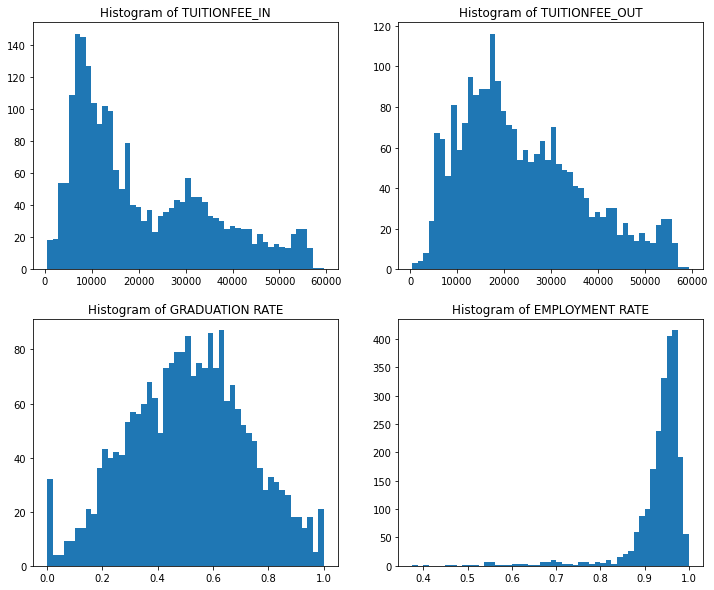

In [15]:
import matplotlib.pyplot as plt

plot_data = ms_1_df.rename(columns={'C150_4':'GRADUATION RATE'})

plt.figure(figsize=(12,10))
vars_to_plot = ['TUITIONFEE_IN', 'TUITIONFEE_OUT','GRADUATION RATE','EMPLOYMENT RATE']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    plt.hist(plot_data[var],50)
    title_string = "Histogram of " + var
    plt.title(title_string)

In [13]:
ms_1_df.corr()

,LATITUDE,LONGITUDE,LOCALE,TUITIONFEE_IN,TUITIONFEE_OUT,C150_4,COUNT_WNE_3YR,COUNT_NWNE_3YR,EMPLOYMENT RATE
LATITUDE,1.000000,-0.108883,0.118441,0.228195,0.252029,0.156081,-0.030521,-0.101933,0.454768
LONGITUDE,-0.108883,1.000000,0.054868,0.082350,0.049432,0.048941,-0.033997,-0.043562,-0.137328
LOCALE,0.118441,0.054868,1.000000,-0.058189,-0.063936,-0.077007,-0.077914,-0.088946,0.083534
TUITIONFEE_IN,0.228195,0.082350,-0.058189,1.000000,0.912288,0.554896,-0.175395,-0.153540,0.235218
TUITIONFEE_OUT,0.252029,0.049432,-0.063936,0.912288,1.000000,0.649473,-0.086631,-0.128471,0.326944
C150_4,0.156081,0.048941,-0.077007,0.554896,0.649473,1.000000,-0.110649,-0.143812,0.159402
COUNT_WNE_3YR,-0.030521,-0.033997,-0.077914,-0.175395,-0.086631,-0.110649,1.000000,0.945853,0.025047
COUNT_NWNE_3YR,-0.101933,-0.043562,-0.088946,-0.153540,-0.128471,-0.143812,0.945853,1.000000,-0.094099
EMPLOYMENT RATE,0.454768,-0.137328,0.083534,0.235218,0.326944,0.159402,0.025047,-0.094099,1.000000
